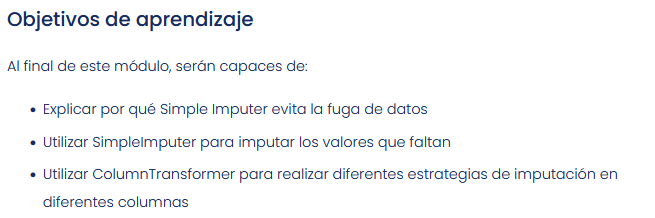

Los datos faltantes tambien se deben abordar como parte de los datos de preprocesamiento requeridos por el aprendizaje automatico.

Esto significa que no imputaremos valores que se basan en cualquier calculo que involucre un conjunto de prueba

Cualquier calculo, como la media, mediana o la moda. **DEBE** hacerse usando solo el conjunto de entrenamiento para evitar uan fuga de datos.

### imputamos _**DESPUES**_ de nuestra division de validacion.

SimpleImputer de sklearn permite realizar calculos en los datos de entrenamiento y luego aplicar dichos calculos a los datos de entrenamiento y de prueba en solo unas pocas lineas de codigo.

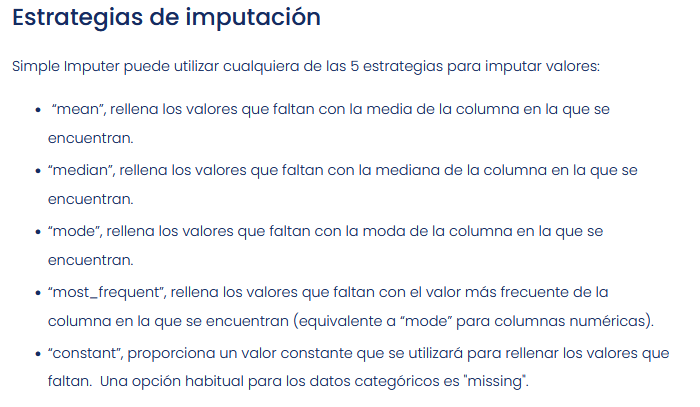

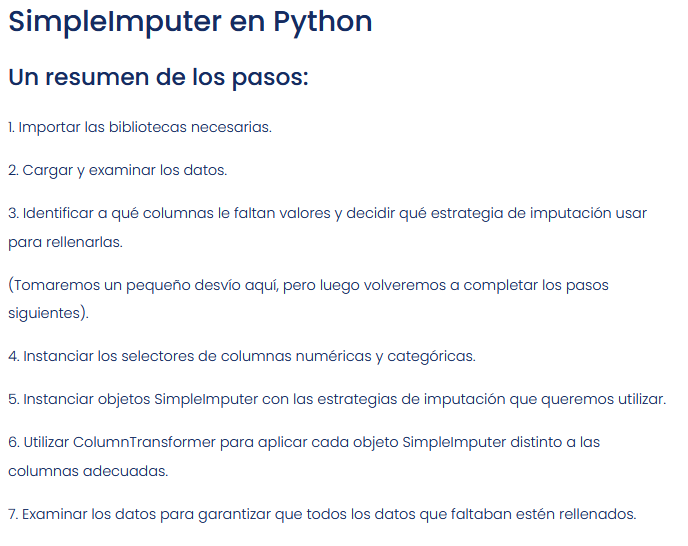

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display="diagram")

In [3]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [4]:
filename = "/content/drive/MyDrive/Data CodingDojo/medical_data.xlsx"

df = pd.read_excel(filename)

df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53.0,14370.14,Widowed,Female,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78.0,39741.49,Married,Male,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22.0,1209.56,Widowed,Female,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,CT Scan,1.254807,2113.073274,3716.525786


## Examinar datos faltantes


In [5]:
print(df.isna().sum().sum(), "missing values")

72 missing values


Hay en total 72 valores que faltan, repartidos en 14 columnas diferentes

algunas columnas con datos faltantes son numericas y otras son categoricas (object). 

Podemos usar **mean, median, mode, most_frequent** o estrategias de imputacion (imputer) constante para los datos numericos, pero solo las estrategias constante o most_frequent para los datos categoricos.

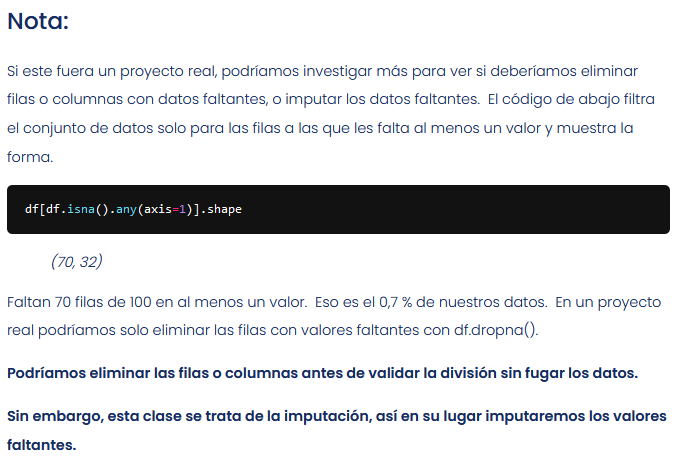

# Train test split

la imputacion de los valores faltantes puede filtrar informacion de los datos de prueba a los datos de entrenamiento, asi que **imputamos los valores despues de dividir los datos**.


In [7]:
X = df.drop(columns="Additional_charges")
y = df["Additional_charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Seleccion de columnas

vamos a separar nuestras caracteristicas en dos tipos de columnas basandonos en el tipo de datos. Una sera nuestra columnas que incluiran los numeros enteros  flotantes. La otra columna sera las columnas categoricas que incluyen nuestras cadenas (objetos)

In [8]:
# isntanciar selectores a nuestros tipos de datos: numericos y categoricos

num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

#selecciones las columnas  cada tipo

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

#validacion

print("numeric columns are", num_columns)
print("categorical columns are", cat_columns)


numeric columns are ['Lat', 'Lng', 'Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_days', 'TotalCharge']
categorical columns are ['State', 'Area', 'Marital', 'Gender', 'Initial_admin', 'Complication_risk', 'Services']


# Metodo de imputacion

antes de empezar, se necesita comprender nuestros datos. El codigo de abajo aislara las columnas numericas a las que les faltan datos. Podemos hacer esto para ver que estrategia de imputacion deberiamos usar.

In [9]:
# aislar columnas numericas

df_num = df[num_columns]

# aislar columnas con datos faltantes

df_num.loc[:, df_num.isna().any()]

,Children,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,NaN,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
995,3.0,0.0,1.0,1.0,0.0,0.0,0.0
996,2.0,1.0,0.0,NaN,1.0,1.0,1.0
997,0.0,1.0,0.0,1.0,1.0,0.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Todas las columnas numericas parecen tener valores enteros (aunque no son tipos de datos enteros). 

Si utilizaramos una estrategia de "mean", se rellenarian con valores decimales (flotantes). 

Para rellenarlos con valores enteros necesitamos usar estrategias de "median". De hecho las columnas de arriba, con excepcion de "children" son valores booleanos. El valor 0.0 representa "no" y 1.0 "si"

# Simple imputer sin columntransformer

En primer lugar, vamos a comprobar a que columnas le faltan datos.

In [10]:
X_train.isna().any()

State                  True
Lat                   False
Lng                   False
Area                   True
Children               True
Age                   False
Income                False
Marital                True
Gender                 True
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin          True
HighBlood             False
Stroke                False
Complication_risk      True
Overweight            False
Arthritis              True
Diabetes               True
Hyperlipidemia         True
BackPain               True
Anxiety                True
Allergic_rhinitis      True
Reflux_esophagitis    False
Asthma                False
Services               True
Initial_days          False
TotalCharge           False
dtype: bool

El siguiente codigo muestra como aplicar el Simple Imputer a las columnas que fueron previamente seleccionadas como y definidas como num_columns.

tengan en cuenta que el paso con .fit solo se aplica al conjunto de entrenamiento!

In [11]:
# instanciar el objecto imputer de la clase SimpleImputer con la estrategia "median"
median_imputer = SimpleImputer(strategy="median")
# encajen el objeto imputer en los datos de entrenamiento numerico con .fit()
# calculen las medianas (medians) de las columnas en el conjunto de entrenamiento
median_imputer.fit(X_train[num_columns])
#utilicen la mediana a partir de los datos de entrenamiento para rellenar los valores que falten
#las columnas numericas de los conjuntos de entrenamiento y de prueba con . transform()
X_train.loc[:, num_columns] =  median_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = median_imputer.transform(X_test[num_columns])


In [13]:
# comprobacion
X_train.isna().any()

State                  True
Lat                   False
Lng                   False
Area                   True
Children              False
Age                   False
Income                False
Marital                True
Gender                 True
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin          True
HighBlood             False
Stroke                False
Complication_risk      True
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
Services               True
Initial_days          False
TotalCharge           False
dtype: bool

Las columnas numericas no tienen valores faltantes, pero las categoricas las siguen teniendo. Podriamos repetir este proceso con otro SimpleImputer usando otra estrategia (most_frequent o constant) o podemos usar ColumnTransformer para imputar valores faltantes en las columnas numericas y categoricas al mismo tiempo

#SimpleImputer con ColumnTransformer

recreemos nuestro X_train original con todos los datos faltantes y veamos como ColumnTransformer, combinado con SimpleImputer, puede imputar las columnas numericas con medianas, y las columnas categoricas con el valor mas frecuente

In [15]:
#Creacion de X_train nuevo con los valores faltantes
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 41)
X_train.isna().any()

State                  True
Lat                   False
Lng                   False
Area                   True
Children               True
Age                   False
Income                False
Marital                True
Gender                 True
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin          True
HighBlood             False
Stroke                False
Complication_risk      True
Overweight            False
Arthritis              True
Diabetes               True
Hyperlipidemia         True
BackPain               True
Anxiety                True
Allergic_rhinitis      True
Reflux_esophagitis    False
Asthma                False
Services               True
Initial_days          False
TotalCharge           False
dtype: bool

# Instanciacion ColumnSelectors

In [16]:
# instancien los selectores para nuestros tipos de datos: categoricos y numericos
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

# Instanciar imputers

rellenaremos los datos faltantes en columnas numericas con "median" de cada columna y datos faltantes en columnas categoricas con el valor mas frecuente.

no son las unicas opciones, pero es lo que haremos hoy.

In [17]:
# instanciar SimpleImputers con estrategias most_frequent y median
freq_imputer = SimpleImputer(strategy="most_frequent")
median_imputer = SimpleImputer(strategy="median")

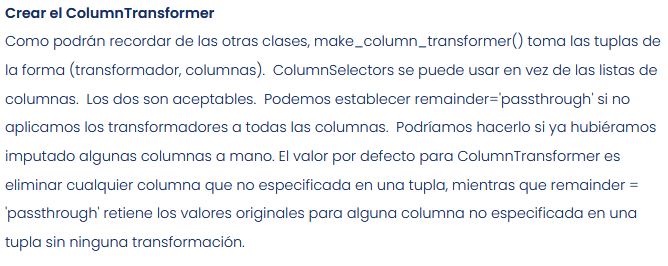

In [18]:
# crear tuplas de (Imputer, selector) para cada tipo de dato
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)
# instanciacion de columntransformer

col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder="passthrough")
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe04faee880>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe04faeea30>)])

# Imputar los valores faltantes con columntransformer

In [19]:
# ajustar columntransformer en los datos de entrenamiento
col_transformer.fit(X_train)
# transformen los datos de entrenamiento y de prueba (esto genera un array de numpy)
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)
# cambien el resultado regreso a un dataframe
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().any()

State                 False
Lat                   False
Lng                   False
Area                  False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
Services              False
Initial_days          False
TotalCharge           False
dtype: bool

Pueden observar que nuestro DataFrame ya no le faltan valores. Al usar ColumnTransformer, este reduce la complejidad de nuestro codigo, reduce las posibilidades de error, y despues observaran que podemos usarlo con tras herramientas para simplificar el proceso de modelo.

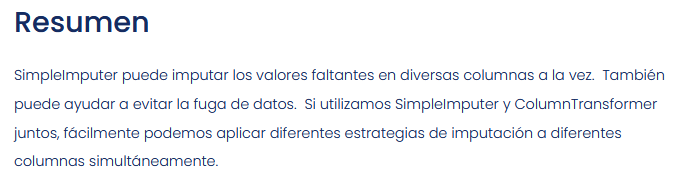